In [2]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
# Importing data
path = "" # Put path of your folder of your data if it's not in the same folder
data_train = pd.read_csv(path + "test.csv")
data_train.shape

(8764, 8)

In [3]:
data_train.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


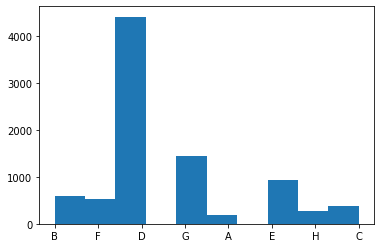

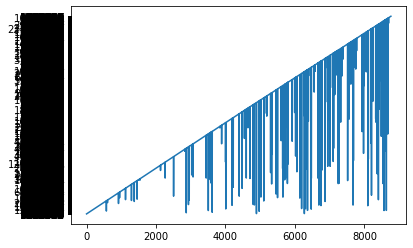

TypeError: ignored

In [4]:
# Visualization
# Individual Plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["views"])
plt.show()

data_train = data_train[data_train["views"] < 3000000]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


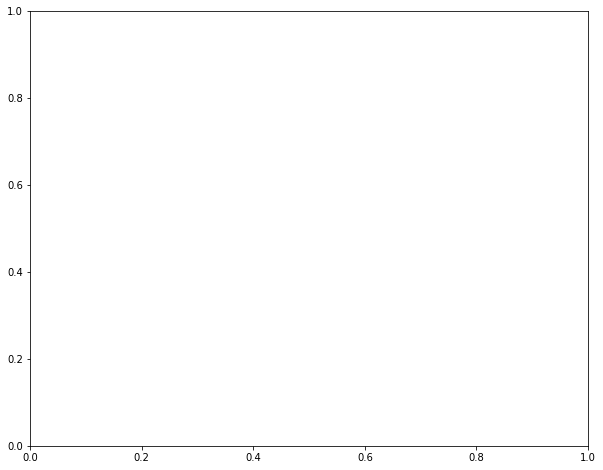

In [5]:
# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
try:
    corr = data_train.corr()
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax,annot=True)
except ValueError:
    pass
plt.show()



In [6]:
# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [7]:
# Convert values to integers for views, likes, comments, dislikes and views
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["views"]=pd.to_numeric(data_train["views"])
column_vidid=data_train['vidid']
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()


,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [8]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
        if(i == "M"):
            m = mm
            mm = ''
        else:
            s = mm
            mm = ''
        if(h==''):
            h = '00'
        if(m == ''):
            m = '00'
        if(s==''):
            s='00'
            bp = h+':'+m+':'+s
        return bp

    train=pd.read_csv("test.csv")
    mp = pd.read_csv(path + "test.csv")["duration"]
    time = mp.apply(checki)
    def func_sec(time_string):
        h, m, s = time_string.split(':')
        return int(h) * 3600 + int(m) * 60 + int(s)
    time1=time.apply(func_sec)
    data_train["duration"]=time1
    

In [9]:
# Split Data
y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["views"], axis=1)
data_train=data_train.drop(["vidid"], axis=1)
data_train.head()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, y_train, test_size=0.2, random_state=42)
X_train.shape

(6839, 6)

In [10]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.29164772753175394

In [11]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [12]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 1425185.2779603912
Mean Squared Error: 25509746967203.83
Root Mean Squared Error: 5050717.470538599


In [13]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 1425185.2779603912
Mean Squared Error: 25509746967203.83
Root Mean Squared Error: 5050717.470538599


In [14]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 1495688.1894736842
Mean Squared Error: 113329392324493.66
Root Mean Squared Error: 10645627.850178385


In [15]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth)
min_samples_split.random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

AttributeError: ignored

In [16]:

# Artificial Neural Network
from tensorflow import keras
from keras.layers import Dense
from keras.optimizer_v1 import Adam


ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)


#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeviews.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeviews.h5")



Epoch 1/100
214/214 [==============================] - 1s 2ms/step - loss: 17152145883136.0000 - mean_squared_error: 17152145883136.0000
Epoch 2/100
214/214 [==============================] - 0s 2ms/step - loss: 17152132251648.0000 - mean_squared_error: 17152132251648.0000
Epoch 3/100
214/214 [==============================] - 0s 2ms/step - loss: 17152098697216.0000 - mean_squared_error: 17152098697216.0000
Epoch 4/100
214/214 [==============================] - 0s 2ms/step - loss: 17152030539776.0000 - mean_squared_error: 17152030539776.0000
Epoch 5/100
214/214 [==============================] - 0s 2ms/step - loss: 17151919390720.0000 - mean_squared_error: 17151919390720.0000
Epoch 6/100
214/214 [==============================] - 0s 1ms/step - loss: 17151757910016.0000 - mean_squared_error: 17151757910016.0000
Epoch 7/100
214/214 [==============================] - 0s 2ms/step - loss: 17151538757632.0000 - mean_squared_error: 17151538757632.0000
Epoch 8/100
214/214 [====================